In [1]:
# Import Packges 

import numpy as np
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import sklearn 
import sspa
import sspa.utils
import gseapy.plot as gp
import networkx
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px
import urllib.request
import statsmodels
import bioinfokit as bf
import networkx as nx
import math
import itertools
import fancyimpute


In [2]:
# Import Reactome
reactome_pathways = sspa.process_reactome("Homo sapiens", download_latest=True, filepath=".")

Beginning Reactome download...
Reactome DB file saved to ./Reactome_Homo_sapiens_pathways_compounds_R83.gmt
Complete!


In [3]:
#Make two lists to zip together
reactome_uniprot = sspa.process_reactome("Homo sapiens","/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Databases/UniProt2Reactome_All_Levels.txt") 
reactome_uniprot_id = reactome_uniprot.index
reactome_uniprot_pathway = reactome_uniprot["Pathway_name"]

# Make a dictionary with two lists 
reactome_dict = dict(zip(reactome_uniprot_id, reactome_uniprot_pathway)) # zip is a way of pulling two lists together (need to be same length) and put it into a tupple (pair of things)
reactome_dict


{'R-HSA-1059683': 'Interleukin-6 signaling',
 'R-HSA-109581': 'Apoptosis',
 'R-HSA-109582': 'Hemostasis',
 'R-HSA-109606': 'Intrinsic Pathway for Apoptosis',
 'R-HSA-109703': 'PKB-mediated events',
 'R-HSA-109704': 'PI3K Cascade',
 'R-HSA-110056': 'MAPK3 (ERK1) activation',
 'R-HSA-110312': 'Translesion synthesis by REV1',
 'R-HSA-110313': 'Translesion synthesis by Y family DNA polymerases bypasses lesions on DNA template',
 'R-HSA-110314': 'Recognition of DNA damage by PCNA-containing replication complex',
 'R-HSA-110320': 'Translesion Synthesis by POLH',
 'R-HSA-110328': 'Recognition and association of DNA glycosylase with site containing an affected pyrimidine',
 'R-HSA-110329': 'Cleavage of the damaged pyrimidine ',
 'R-HSA-110330': 'Recognition and association of DNA glycosylase with site containing an affected purine',
 'R-HSA-110331': 'Cleavage of the damaged purine',
 'R-HSA-110357': 'Displacement of DNA glycosylase by APEX1',
 'R-HSA-110362': 'POLB-Dependent Long Patch Base Ex

In [4]:
names_pathways = reactome_pathways.iloc[:,:1]
names_pathways.index.name = 'Node'

In [5]:
# Read in protein and metabolite data

#All metabolite data from Metabolomics_EDA
metabolite_data = pd.read_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/metabolite_all.csv',index_col=0)
metabolite_data


,Pathway_1,Pathway_2,Correlation,Correlation_abs,p_val,p_val_adjust,log10_p_val_adjusted,Overlap_Correlation
0,R-HSA-110331,R-HSA-110331,1.000000,1.000000,0.000000e+00,0.000000e+00,inf,1.0
1,R-HSA-110331,R-HSA-112310,-0.349838,0.349838,5.486517e-09,1.218062e-04,3.914331,0.0
2,R-HSA-110331,R-HSA-112311,0.389574,0.389574,5.821297e-11,1.292386e-06,5.888608,0.0
3,R-HSA-110331,R-HSA-112315,0.498185,0.498185,6.655964e-18,1.477691e-13,12.830416,0.0
4,R-HSA-110331,R-HSA-1237112,0.747982,0.747982,2.269312e-48,5.038100e-44,43.297733,0.0
...,...,...,...,...,...,...,...,...
22196,R-HSA-975634,R-HSA-9734207,-0.025499,0.025499,6.806149e-01,1.000000e+00,-0.000000,0.5
22197,R-HSA-975634,R-HSA-9735804,-0.049942,0.049942,4.199130e-01,1.000000e+00,-0.000000,0.0
22198,R-HSA-975634,R-HSA-9749641,0.082327,0.082327,1.831827e-01,1.000000e+00,-0.000000,0.5
22199,R-HSA-975634,R-HSA-9753281,-0.021690,0.021690,7.262464e-01,1.000000e+00,-0.000000,0.0


In [6]:
#All protein data from Proteomics_EDA
protein_data =  pd.read_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/protein_all.csv', index_col=0)
protein_data

,Pathway_1,Pathway_2,Correlation,Correlation_abs,p_val,p_val_adjust,log10_p_val_adjusted,Overlap_Correlation
0,R-HSA-109581,R-HSA-109581,1.000000,1.000000,0.000000,0.0,inf,1.0
93159,R-HSA-2033519,R-HSA-5654693,1.000000,1.000000,0.000000,0.0,inf,0.0
93160,R-HSA-2033519,R-HSA-5654695,1.000000,1.000000,0.000000,0.0,inf,0.0
93161,R-HSA-2033519,R-HSA-5654696,1.000000,1.000000,0.000000,0.0,inf,0.0
93162,R-HSA-2033519,R-HSA-5654699,1.000000,1.000000,0.000000,0.0,inf,0.0
...,...,...,...,...,...,...,...,...
204697,R-HSA-5658442,R-HSA-198725,0.127387,0.127387,0.041298,1.0,-0.0,0.0
204696,R-HSA-5658442,R-HSA-1971475,0.070057,0.070057,0.263138,1.0,-0.0,0.0
204695,R-HSA-5658442,R-HSA-196854,-0.090006,0.090006,0.150209,1.0,-0.0,0.0
204718,R-HSA-5658442,R-HSA-202733,0.088104,0.088104,0.159050,1.0,-0.0,0.0


In [7]:
#All protein data from Metabolomics Node data
protein_data_PA_score = pd.read_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/Protein_pathwayscores.csv',index_col=0)

In [8]:
#All metabolite data from Metabolomics Node data
metabolite_data_PA_score = pd.read_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/Metabolite_pathwayscores.csv',index_col=0)

In [9]:
# Make dataframe with average score for metabolites and proteins
merge_pathwayscores = pd.merge(metabolite_data_PA_score, protein_data_PA_score, on="Node")

In [10]:
costs = np.column_stack(([3, 2, 1, 3], [7, 6, 6, 5]))
costs

mean_costs = np.mean(costs[:,0])
mean_costs

2.25

In [11]:

# Make new dataframe with just means
merge_mean_pathwayscores = pd.DataFrame(merge_pathwayscores["Node"])
merge_mean_pathwayscores["Healthy_mean"] = merge_pathwayscores[["Pathway_Score_healthy_x", "Pathway_Score_healthy_y"]].mean(axis=1)
merge_mean_pathwayscores["Mild_mean"] = merge_pathwayscores[["Pathway_Score_mild_x", "Pathway_Score_mild_y"]].mean(axis=1)
merge_mean_pathwayscores["Moderate_mean"] = merge_pathwayscores[["Pathway_Score_moderate_x", "Pathway_Score_moderate_y"]].mean(axis=1)
merge_mean_pathwayscores["Severe_mean"] = merge_pathwayscores[["Pathway_Score_severe_x", "Pathway_Score_severe_y"]].mean(axis=1)
merge_mean_pathwayscores

,Node,Healthy_mean,Mild_mean,Moderate_mean,Severe_mean
0,R-HSA-112315,-0.241658,0.279002,0.187481,0.227342
1,R-HSA-1428517,-0.187296,0.236115,0.112211,0.187404
2,R-HSA-1483257,-0.272196,0.454792,0.133978,0.199945
3,R-HSA-156580,-0.222747,0.144694,0.213035,0.325688
4,R-HSA-15869,-0.036131,0.042835,0.004563,0.017219
5,R-HSA-1592230,-0.074145,0.081413,0.064120,0.033541
6,R-HSA-168249,-0.215081,0.157009,0.199603,0.291898
7,R-HSA-196071,0.005790,-0.045410,0.031995,-0.008271
8,R-HSA-196849,-0.192159,0.003532,0.224535,0.398576
9,R-HSA-196854,0.175658,-0.189589,-0.113094,-0.232238


In [12]:
# Pathway hiercharcy
hierarchy = pd.read_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/hierarchy_hsa_all.csv', index_col=0)
hierarchy.columns = ['Parent', 'Node', 'Hierarchy']
hierarchy

,Parent,Node,Hierarchy
10591,R-HSA-109581,R-HSA-109606,R-HSA-5357801
10592,R-HSA-109581,R-HSA-169911,R-HSA-5357801
10593,R-HSA-109581,R-HSA-5357769,R-HSA-5357801
10594,R-HSA-109581,R-HSA-75153,R-HSA-5357801
10595,R-HSA-109582,R-HSA-140877,R-HSA-109582
...,...,...,...
24,R-HSA-8963743,R-HSA-8963743,R-HSA-8963743
25,R-HSA-9609507,R-HSA-9609507,R-HSA-9609507
26,R-HSA-9612973,R-HSA-9612973,R-HSA-9612973
27,R-HSA-9709957,R-HSA-9709957,R-HSA-9709957


In [13]:
# Name pathways with names

hierarchy['Hierarchy'] = hierarchy['Hierarchy'].map(reactome_dict)
hierarchy

,Parent,Node,Hierarchy
10591,R-HSA-109581,R-HSA-109606,Programmed Cell Death
10592,R-HSA-109581,R-HSA-169911,Programmed Cell Death
10593,R-HSA-109581,R-HSA-5357769,Programmed Cell Death
10594,R-HSA-109581,R-HSA-75153,Programmed Cell Death
10595,R-HSA-109582,R-HSA-140877,Hemostasis
...,...,...,...
24,R-HSA-8963743,R-HSA-8963743,Digestion and absorption
25,R-HSA-9609507,R-HSA-9609507,Protein localization
26,R-HSA-9612973,R-HSA-9612973,Autophagy
27,R-HSA-9709957,R-HSA-9709957,Sensory Perception


In [14]:
protein_data.columns = ["Pathway_1", "Pathway_2", "Correlation_protein", "Correlation_abs_protein", "p_val_protein", "p_val_adjust_protein", "log10_p_val_adjusted_protein", "Overlap_protein"]
protein_data

,Pathway_1,Pathway_2,Correlation_protein,Correlation_abs_protein,p_val_protein,p_val_adjust_protein,log10_p_val_adjusted_protein,Overlap_protein
0,R-HSA-109581,R-HSA-109581,1.000000,1.000000,0.000000,0.0,inf,1.0
93159,R-HSA-2033519,R-HSA-5654693,1.000000,1.000000,0.000000,0.0,inf,0.0
93160,R-HSA-2033519,R-HSA-5654695,1.000000,1.000000,0.000000,0.0,inf,0.0
93161,R-HSA-2033519,R-HSA-5654696,1.000000,1.000000,0.000000,0.0,inf,0.0
93162,R-HSA-2033519,R-HSA-5654699,1.000000,1.000000,0.000000,0.0,inf,0.0
...,...,...,...,...,...,...,...,...
204697,R-HSA-5658442,R-HSA-198725,0.127387,0.127387,0.041298,1.0,-0.0,0.0
204696,R-HSA-5658442,R-HSA-1971475,0.070057,0.070057,0.263138,1.0,-0.0,0.0
204695,R-HSA-5658442,R-HSA-196854,-0.090006,0.090006,0.150209,1.0,-0.0,0.0
204718,R-HSA-5658442,R-HSA-202733,0.088104,0.088104,0.159050,1.0,-0.0,0.0


In [15]:
metabolite_data.columns = ["Pathway_1", "Pathway_2", "Correlation_met", "Correlation_abs_met", "p_val_met", "p_val_adjust_met", "log10_p_val_adjusted_met", "Overlap_met"]
metabolite_data

,Pathway_1,Pathway_2,Correlation_met,Correlation_abs_met,p_val_met,p_val_adjust_met,log10_p_val_adjusted_met,Overlap_met
0,R-HSA-110331,R-HSA-110331,1.000000,1.000000,0.000000e+00,0.000000e+00,inf,1.0
1,R-HSA-110331,R-HSA-112310,-0.349838,0.349838,5.486517e-09,1.218062e-04,3.914331,0.0
2,R-HSA-110331,R-HSA-112311,0.389574,0.389574,5.821297e-11,1.292386e-06,5.888608,0.0
3,R-HSA-110331,R-HSA-112315,0.498185,0.498185,6.655964e-18,1.477691e-13,12.830416,0.0
4,R-HSA-110331,R-HSA-1237112,0.747982,0.747982,2.269312e-48,5.038100e-44,43.297733,0.0
...,...,...,...,...,...,...,...,...
22196,R-HSA-975634,R-HSA-9734207,-0.025499,0.025499,6.806149e-01,1.000000e+00,-0.000000,0.5
22197,R-HSA-975634,R-HSA-9735804,-0.049942,0.049942,4.199130e-01,1.000000e+00,-0.000000,0.0
22198,R-HSA-975634,R-HSA-9749641,0.082327,0.082327,1.831827e-01,1.000000e+00,-0.000000,0.5
22199,R-HSA-975634,R-HSA-9753281,-0.021690,0.021690,7.262464e-01,1.000000e+00,-0.000000,0.0


In [16]:
#Merge dataframes

merge_p_m =pd.merge(metabolite_data, protein_data, on =["Pathway_1", "Pathway_2"])
merge_p_m

,Pathway_1,Pathway_2,Correlation_met,Correlation_abs_met,p_val_met,p_val_adjust_met,log10_p_val_adjusted_met,Overlap_met,Correlation_protein,Correlation_abs_protein,p_val_protein,p_val_adjust_protein,log10_p_val_adjusted_protein,Overlap_protein
0,R-HSA-112315,R-HSA-112315,1.000000,1.000000,0.000000e+00,0.000000e+00,inf,0.0,1.000000,1.000000,0.000000e+00,0.000000e+00,inf,0.0
1,R-HSA-112315,R-HSA-1428517,-0.193927,0.193927,1.577485e-03,1.000000e+00,-0.000000,0.0,0.716394,0.716394,9.469183e-42,3.109007e-36,35.507378,0.0
2,R-HSA-112315,R-HSA-1483257,0.418575,0.418575,1.403258e-12,3.115372e-08,7.506490,0.0,0.825260,0.825260,3.197925e-65,1.049972e-59,58.978822,0.0
3,R-HSA-112315,R-HSA-156580,0.269162,0.269162,9.588652e-06,2.128777e-01,0.671870,0.0,0.626231,0.626231,2.145876e-29,7.045532e-24,23.152086,0.0
4,R-HSA-112315,R-HSA-15869,-0.609690,0.609690,3.665577e-28,8.137948e-24,23.089485,0.0,0.666543,0.666543,2.195273e-34,7.207718e-29,28.142202,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,R-HSA-975634,R-HSA-8978868,-0.908177,0.908177,1.049081e-100,2.329066e-96,95.632818,0.5,-0.644940,0.644940,1.285432e-31,4.220445e-26,25.374642,0.0
2397,R-HSA-975634,R-HSA-9707564,1.000000,1.000000,0.000000e+00,0.000000e+00,inf,0.5,0.736979,0.736979,2.830697e-45,9.294000e-40,39.031797,0.0
2398,R-HSA-975634,R-HSA-9707616,1.000000,1.000000,0.000000e+00,0.000000e+00,inf,1.0,0.736979,0.736979,2.830697e-45,9.294000e-40,39.031797,0.0
2399,R-HSA-975634,R-HSA-9711123,1.000000,1.000000,0.000000e+00,0.000000e+00,inf,0.5,-0.743888,0.743888,1.562217e-46,5.129210e-41,40.289950,0.0


In [17]:

# Drop uneeded columns
merge_p_m.drop(columns = ["log10_p_val_adjusted_met", "log10_p_val_adjusted_protein"])

# Calculate average correlation of protein and metabolite
merge_p_m["average_correlation_abs"] = (merge_p_m["Correlation_abs_met"] + merge_p_m["Correlation_abs_protein"])/2

merge_p_m["average_overlap"] = (merge_p_m["Overlap_met"] + merge_p_m["Overlap_protein"])/2

print(merge_p_m.shape)

(2401, 16)


In [18]:
# Total 
print("Total pathways:",merge_p_m.shape)

# Drop same pathways
merge_p_m= merge_p_m.loc[(merge_p_m["Pathway_1"] != merge_p_m["Pathway_2"])]
print("Drop same pathways:", merge_p_m.shape)

# Drop pathways with p adjusted greater than 0.05
merge_p_m = merge_p_m.loc[(merge_p_m["p_val_adjust_met"]<= 0.05)]
print("Drop pathways with p adjusted greater than 0.05 metabolites", merge_p_m.shape)

merge_p_m = merge_p_m.loc[(merge_p_m["p_val_adjust_protein"]<= 0.05)]
print("Drop pathways with p adjusted greater than 0.05 proteins", merge_p_m.shape)

# Drop pathways with overlap > 0.5
merge_p_m = merge_p_m.loc[(merge_p_m["average_overlap"]<= 0.5)]
print("Drop pathways with overlap greater than 0.5", merge_p_m.shape)

Total pathways: (2401, 16)
Drop same pathways: (2352, 16)
Drop pathways with p adjusted greater than 0.05 metabolites (926, 16)
Drop pathways with p adjusted greater than 0.05 proteins (860, 16)
Drop pathways with overlap greater than 0.5 (849, 16)


Text(0.5, 1.0, 'Merge network - protein and metabolite')

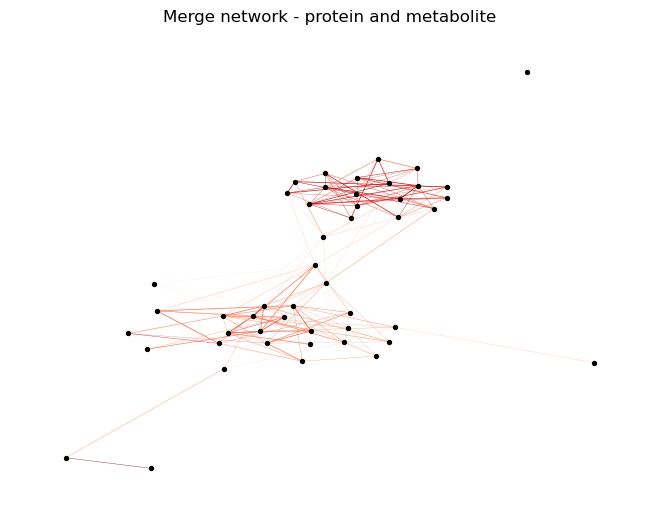

In [19]:
# Make edges
G_merge = nx.from_pandas_edgelist(df=merge_p_m, source='Pathway_1', target='Pathway_2', edge_attr=['average_correlation_abs', 'average_overlap'])
weight_corr = [i['average_correlation_abs'] for i in dict(G_merge.edges).values()]
overlap_coef = [i['average_overlap'] for i in dict(G_merge.edges).values()] 

#Draw graph
nx.draw(G_merge, with_labels=False, node_color = "black", node_size= 8, edge_color=weight_corr, width = overlap_coef, font_size=5, edge_cmap=plt.cm.Reds)
plt.title('Merge network - protein and metabolite')

In [20]:
# Proprties of graph

number_of_nodes = G_merge.number_of_nodes()
print("Number of nodes:", number_of_nodes)

number_of_edges= G_merge.number_of_edges()
print("Number of edges:", number_of_edges)

density =nx.density(G_merge)
print("Graph density:", density)

## Add more attributes
degree_centrality = nx.degree_centrality(G_merge) # Compute the degree centrality for nodes
degree_centrality_df = pd.DataFrame(list(degree_centrality.items()), columns= ["Node", "Degree_centrality"])
degree_centrality_df


clustering = nx.clustering(G_merge) # Compute the clustering coefficent for nodes
clustering_df = pd.DataFrame(list(clustering.items()), columns= ["Node", "Clustering"])
clustering_df

btwn_centrality = nx.betweenness_centrality(G_merge)
btwn_centrality_df = pd.DataFrame(list(btwn_centrality.items()), columns= ["Node", "Betweenness_centrality"])
btwn_centrality_df

degree = list(G_merge.degree)
degree_df = pd.DataFrame(degree, columns = ["Nodes", "Degree"])


Number of nodes: 48
Number of edges: 429
Graph density: 0.3803191489361702


In [21]:
# # LOCKING BECAUSE IT DOES RANDOM SEEDING

# # Community 

# import networkx.algorithms.community as nx_comm
# louvain_communities = nx_comm.louvain_communities(G_merge)
# louvain_communities = pd.DataFrame(louvain_communities)
# louvain_communities

In [22]:
# # Export to excel
# louvain_communities.to_excel('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/louvain_communities_merge.xlsx')

In [23]:
# Import from excel
louvain_communities = pd.read_excel('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Exported files/organized_community_merge.xlsx')

In [24]:
# Merge attributes

attributes_df = pd.merge(degree_centrality_df, clustering_df["Clustering"], left_index = True, right_index = True)
attributes_df = pd.merge(attributes_df, btwn_centrality_df["Betweenness_centrality"], left_index = True, right_index = True)
attributes_df = pd.merge(attributes_df, degree_df["Degree"], left_index = True, right_index = True)
attributes_df = pd.merge(attributes_df, merge_mean_pathwayscores, on=["Node"])
attributes_df = pd.merge(attributes_df, hierarchy, on=["Node"])
attributes_df = pd.merge(attributes_df, louvain_communities, on=["Node"])
attributes_df = pd.merge(attributes_df, names_pathways, on=['Node'])
print(len(attributes_df))

# Drop duplicates
attributes_df_nodups = attributes_df.drop_duplicates(subset=['Node'])
print(len(attributes_df_nodups))

49
48


In [25]:
attributes_dict = attributes_df_nodups.set_index('Node').to_dict('index')
attributes_dict["R-HSA-112315"]

{'Degree_centrality': 0.6595744680851063,
 'Clustering': 0.46021505376344085,
 'Betweenness_centrality': 0.26171296622767853,
 'Degree': 31,
 'Healthy_mean': -0.24165755983990644,
 'Mild_mean': 0.279002030882816,
 'Moderate_mean': 0.18748102289101076,
 'Severe_mean': 0.2273424468664945,
 'Parent': 'R-HSA-112316',
 'Hierarchy': 'Neuronal System',
 'Community': 2,
 'Pathway_name': 'Transmission across Chemical Synapses'}

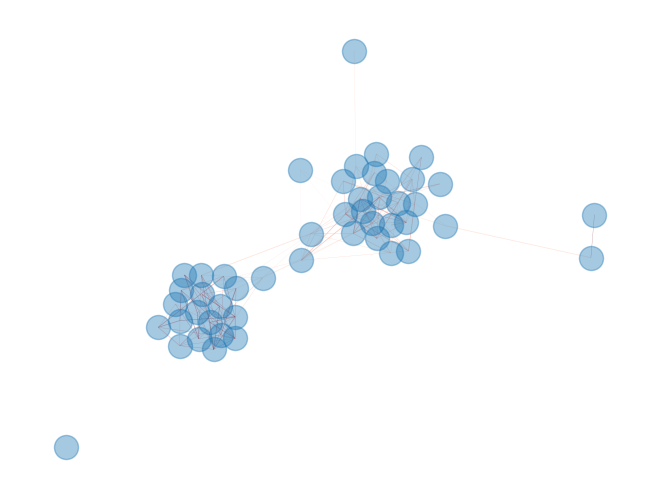

In [26]:
# Make edges
G_merge = nx.from_pandas_edgelist(df=merge_p_m, source='Pathway_1', target='Pathway_2', edge_attr=['average_correlation_abs', 'average_overlap'])
weight_corr = [i['average_correlation_abs'] for i in dict(G_merge.edges).values()]
overlap_coef = [i['average_overlap'] for i in dict(G_merge.edges).values()] 

#Set Node Attributes
nx.set_node_attributes(G_merge, attributes_dict)

#Draw graph
nx.draw(G_merge, with_labels=False,edge_color=weight_corr, width = overlap_coef, font_size=5, edge_cmap=plt.cm.Reds, cmap=plt.cm.Greens, alpha=0.4)

In [27]:
#Save file
#nx.write_gml(G_merge, '/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Cytoscape/Merge_full_network_withattributes_1.17.23_V4.gml')
nx.write_gml(G_merge, '/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/Cytoscape_files/Merge_full_network_withattributes_V6.gml')

# Increase p value strenouness from 0.05 to 0.005

In [28]:
# Total 
print("Total pathways:",merge_p_m.shape)

# Drop same pathways
merge_p_m= merge_p_m.loc[(merge_p_m["Pathway_1"] != merge_p_m["Pathway_2"])]
print("Drop same pathways:", merge_p_m.shape)

# Drop pathways with p adjusted greater than 0.05
merge_p_m = merge_p_m.loc[(merge_p_m["p_val_adjust_met"]<= 0.005)]
print("Drop pathways with p adjusted greater than 0.005 metabolites", merge_p_m.shape)

merge_p_m = merge_p_m.loc[(merge_p_m["p_val_adjust_protein"]<= 0.005)]
print("Drop pathways with p adjusted greater than 0.005 proteins", merge_p_m.shape)

# Drop pathways with overlap > 0.5
merge_p_m = merge_p_m.loc[(merge_p_m["average_overlap"]<= 0.5)]
print("Drop pathways with overlap greater than 0.5", merge_p_m.shape)

merge_p_m_new = merge_p_m
print(merge_p_m_new.shape)

Total pathways: (849, 16)
Drop same pathways: (849, 16)
Drop pathways with p adjusted greater than 0.005 metabolites (800, 16)
Drop pathways with p adjusted greater than 0.005 proteins (794, 16)
Drop pathways with overlap greater than 0.5 (794, 16)
(794, 16)


Text(0.5, 1.0, 'Merge network - protein and metabolite')

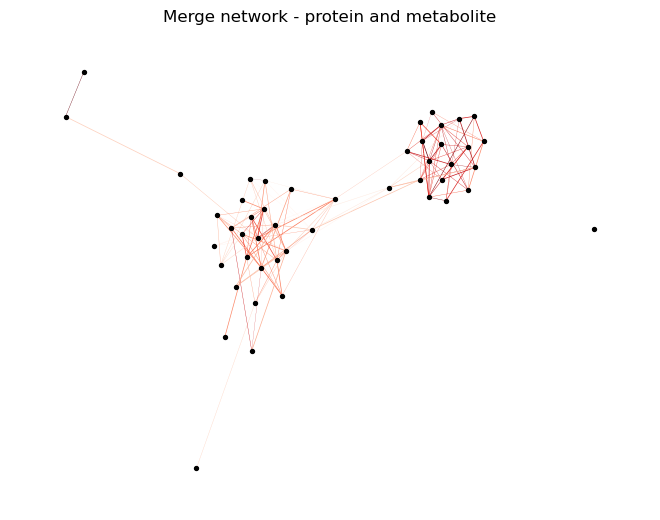

In [29]:
# Make edges
G_merge_new = nx.from_pandas_edgelist(df=merge_p_m_new, source='Pathway_1', target='Pathway_2', edge_attr=['average_correlation_abs', 'average_overlap'])
weight_corr = [i['average_correlation_abs'] for i in dict(G_merge_new.edges).values()]
overlap_coef = [i['average_overlap'] for i in dict(G_merge_new.edges).values()] 

#Draw graph
nx.draw(G_merge_new, with_labels=False, node_color = "black", node_size= 8, edge_color=weight_corr, width = overlap_coef, font_size=5, edge_cmap=plt.cm.Reds)
plt.title('Merge network - protein and metabolite')

In [30]:
# Proprties of graph

number_of_nodes_new = G_merge_new.number_of_nodes()
print("Number of nodes:", number_of_nodes_new)


number_of_edges_new = G_merge_new.number_of_edges()
print("Number of edges:", number_of_edges_new)

density_new =nx.density(G_merge_new)
print("Graph density:", density_new)


Number of nodes: 48
Number of edges: 401
Graph density: 0.3554964539007092


In [31]:

## Add more attributes
degree_centrality = nx.degree_centrality(G_merge_new) # Compute the degree centrality for nodes
degree_centrality_df = pd.DataFrame(list(degree_centrality.items()), columns= ["Node", "Degree_centrality"])
degree_centrality_df


clustering = nx.clustering(G_merge_new) # Compute the clustering coefficent for nodes
clustering_df = pd.DataFrame(list(clustering.items()), columns= ["Node", "Clustering"])
clustering_df

btwn_centrality = nx.betweenness_centrality(G_merge_new)
btwn_centrality_df = pd.DataFrame(list(btwn_centrality.items()), columns= ["Node", "Betweenness_centrality"])
btwn_centrality_df

degree = list(G_merge.degree)
degree_df = pd.DataFrame(degree, columns = ["Nodes", "Degree"])


# Pathway length

In [32]:
metabolite_molecules = pd.read_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/number_of_metabolites.csv')
protein_molecules = pd.read_csv('/Users/sarapatti/Documents/Code MRes DS SP 2022-2023/number_of_proteins.csv')

In [33]:
# Rename
metabolite_molecules.columns = ["Node","Number_of_molecules", "Number_of_molecules_(log10)"]
metabolite_molecules["Omics"]= "Metabolomic"

protein_molecules.columns = ["Node","Number_of_molecules", "Number_of_molecules_(log10)"]
protein_molecules["Omics"]= "Proteomic"

attributes_df_length = pd.merge(protein_molecules, attributes_df, on = 'Node')
integrate_molecules = attributes_df_length.iloc[:,:3]
integrate_molecules["Omics"]= "Integrated"

In [34]:
# Concat files
number_molecules = pd.concat([metabolite_molecules, protein_molecules, integrate_molecules], ignore_index=True)

In [35]:
number_molecules

,Node,Number_of_molecules,Number_of_molecules_(log10),Omics
0,R-HSA-110331,2,0.301030,Metabolomic
1,R-HSA-112310,8,0.903090,Metabolomic
2,R-HSA-112311,3,0.477121,Metabolomic
3,R-HSA-112315,10,1.000000,Metabolomic
4,R-HSA-112316,10,1.000000,Metabolomic
...,...,...,...,...
807,R-HSA-9707564,2,0.301030,Integrated
808,R-HSA-9707616,2,0.301030,Integrated
809,R-HSA-9711123,8,0.903090,Integrated
810,R-HSA-975634,3,0.477121,Integrated


Text(0, 0.5, 'Number of molecules (Log10)')

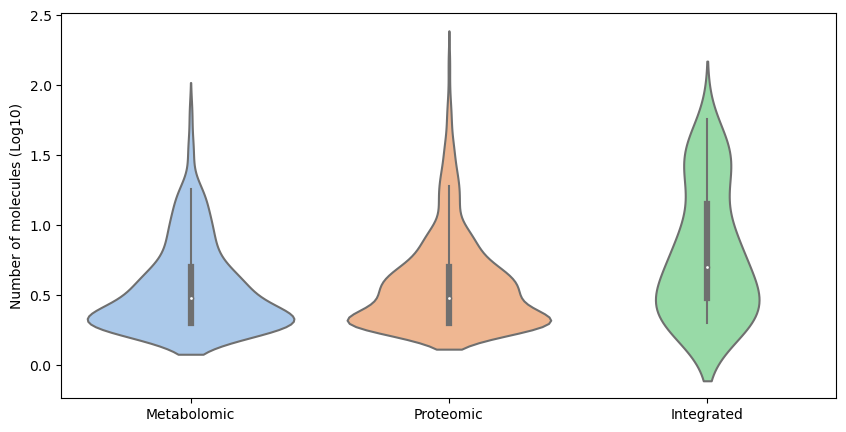

In [36]:
#Plot dimensions
plt.figure(figsize=(10,5)) # has to be above the graph

#Making the violin plot
ax = sns.violinplot(data = number_molecules, y= 'Number_of_molecules_(log10)',  x = 'Omics', palette= "pastel")
ax.set(xlabel=None)
# Labels
plt.ylabel("Number of molecules (Log10)")